In [1]:
from __future__ import division, print_function
import os

# Third-party
import astropy.units as u
from astropy.constants import G
import matplotlib.pyplot as plt
import numpy as np
import yt
%matplotlib inline

# Custom
import gary.dynamics as gd
import gary.integrate as gi
import gary.io as io
import gary.potential as gp
from gary.units import galactic
G = G.decompose(galactic).value

In [2]:
figure_path = "/Users/adrian/projects/morphology-paper/figures/"
potential = gp.load("/Users/adrian/projects/morphology/potentials/triaxial-NFW.yml")
r_s = potential.parameters['r_s']
potential

<LeeSutoTriaxialNFWPotential: a=1.00, c=0.55, b=0.77, r_s=20.00, R=[ 1.  0.  0.  0.  1.  0.  0.  0.  1.], v_c=0.18>

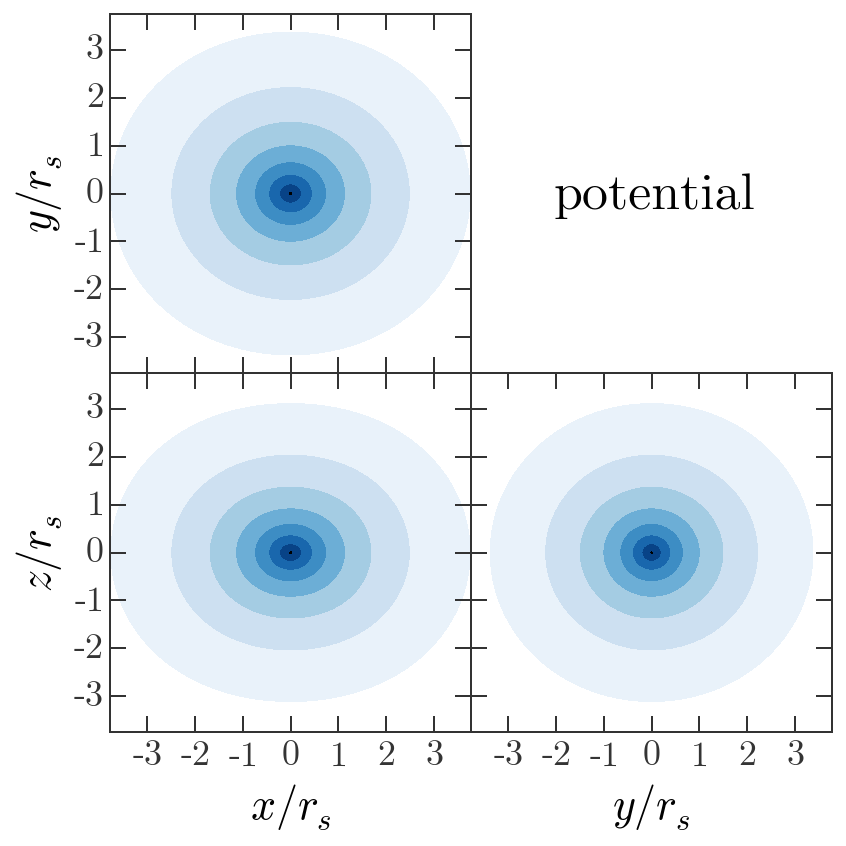

In [61]:
lim = 75
grid = np.linspace(-100,100,1000)
cmap = 'Blues_r'
vals = potential.value(np.array([[1.,0,0],[lim,0,0]]))

levels = np.linspace(vals.min(), vals.max(), 8)
# levels = np.logspace(vals.min(), vals.max(), 10)

# ------------------------------------------------

fig,axes = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)
fig.set_facecolor('w')
fig = potential.plot_contours(grid=(grid,grid,0), ax=axes[0,0], cmap=cmap, levels=levels)
fig = potential.plot_contours(grid=(grid,0,grid), ax=axes[1,0], cmap=cmap, levels=levels)
fig = potential.plot_contours(grid=(0,grid,grid), ax=axes[1,1], cmap=cmap, levels=levels)

axes[0,0].set_xlim(-75,75)
axes[0,0].set_ylim(*axes[0,0].get_xlim())

axes[0,0].set_ylabel(r"$y/r_s$")
axes[1,0].set_xlabel(r"$x/r_s$")
axes[1,0].set_ylabel(r"$z/r_s$")
axes[1,1].set_xlabel(r"$y/r_s$")

# Hack to hide hole
axes[0,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,1].plot(0,0,marker='o',zorder=-1000,c='k')

tk = np.arange(-3,3+1,1)
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_ticks(tk * r_s)
    ax.yaxis.set_ticks(tk * r_s)
    
    ax.xaxis.set_ticklabels(["{0:d}".format(x) for x in tk])
    ax.yaxis.set_ticklabels(["{0:d}".format(x) for x in tk])

fig.text(0.77,0.75,"potential", fontsize=26, ha="center")

fig.tight_layout()
fig.subplots_adjust(wspace=0., hspace=0.)
axes[0,1].set_visible(False)

fig.savefig(os.path.join(figure_path, "potential.pdf"))

---

In [4]:
from scipy.misc import derivative

In [5]:
def func(x):
    return potential.value([x,0.,0.])[0]

dens_grid = np.linspace(1,250,128)
num_dens = np.array([-derivative(func, x, 0.1, n=2) / (4*np.pi*potential.G) for x in dens_grid])
num_dens

array([ 5029499.38710697,  4071252.10442516,  3350248.43854033,
        2795870.91177146,  2361635.97709216,  2016004.12404656,
        1737008.59880121,  1508997.36176843,  1320592.13904786,
        1163373.26940718,  1031010.8341513 ,   918677.72227317,
         822645.17385769,   739999.01396659,   668437.29851018,
         606123.85794687,   551580.84926206,   503608.94188036,
         461227.34202536,   423628.24669228,   390141.91234666,
         360209.61828573,   333362.56134776,   309205.24725433,
         287402.32666254,   267668.08126026,   249757.97861148,
         233461.83889009,   218598.27945192,   205010.16995088,
         192560.89375526,   181131.26077526,   170616.94241121,
         160926.33299186,   151978.75817233,   143702.96824774,
         136035.86577577,   128921.4271352 ,   122309.78574704,
         116156.44924955,   110421.62904173,   105069.66481927,
         100068.52878823,    95389.39664704,    91006.2770659 ,
          86895.68815314,    83036.37747

In [6]:
xyz = np.zeros((len(dens_grid),3))
xyz[:,0] = dens_grid
func_dens = potential.density(xyz)
func_dens

array([  1.97093764e+08,   5.56877603e+07,   2.84377472e+07,
         1.74776955e+07,   1.18159608e+07,   8.47951147e+06,
         6.34372268e+06,   4.89557660e+06,   3.87084925e+06,
         3.12127353e+06,   2.55814201e+06,   2.12566277e+06,
         1.78730786e+06,   1.51835719e+06,   1.30160990e+06,
         1.12480963e+06,   9.79041866e+05,   8.57705046e+05,
         7.55832102e+05,   6.69632420e+05,   5.96176149e+05,
         5.33172558e+05,   4.78811797e+05,   4.31650241e+05,
         3.90526258e+05,   3.54497550e+05,   3.22794023e+05,
         2.94781945e+05,   2.69936430e+05,   2.47820126e+05,
         2.28066562e+05,   2.10367040e+05,   1.94460230e+05,
         1.80123872e+05,   1.67168100e+05,   1.55430041e+05,
         1.44769431e+05,   1.35065017e+05,   1.26211615e+05,
         1.18117667e+05,   1.10703220e+05,   1.03898242e+05,
         9.76412092e+04,   9.18779226e+04,   8.65605066e+04,
         8.16465634e+04,   7.70984538e+04,   7.28826835e+04,
         6.89693801e+04,

In [7]:
func_dens / num_dens

array([ 39.18755105,  13.67828837,   8.48825028,   6.25125268,
         5.00329472,   4.20609828,   3.6520963 ,   3.24425789,
         2.93114667,   2.68295105,   2.48119799,   2.31382859,
         2.1726352 ,   2.05183678,   1.94724308,   1.85574222,
         1.77497436,   1.70311719,   1.63874088,   1.58070767,
         1.52810075,   1.48017302,   1.43630945,   1.39599908,
         1.35881384,   1.32439232,   1.29242727,   1.2626558 ,
         1.23485157,   1.20881869,   1.1843867 ,   1.16140659,
         1.13974748,   1.11929396,   1.09994385,   1.08160634,
         1.06420046,   1.04765375,   1.03190121,   1.01688428,
         1.00255014,   0.98885099,   0.97574343,   0.963188  ,
         0.95114875,   0.93959281,   0.92849009,   0.91781301,
         0.90753622,   0.89763635,   0.88809188,   0.87888292,
         0.86999105,   0.86139921,   0.85309158,   0.84505344,
         0.83727108,   0.82973174,   0.8224235 ,   0.81533524,
         0.80845654,   0.80177766,   0.79528944,   0.78

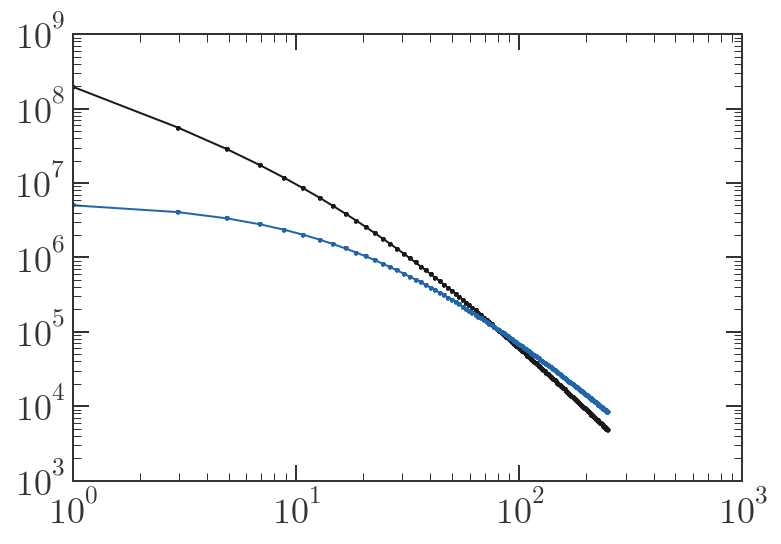

In [8]:
plt.loglog(dens_grid, func_dens)
plt.loglog(dens_grid, num_dens)

In [9]:
levels

array([-0.15096654, -0.1377097 , -0.12445286, -0.11119602, -0.09793918,
       -0.08468234, -0.0714255 , -0.05816866])

[ 4.   4.5  5.   5.5  6.   6.5  7. ]


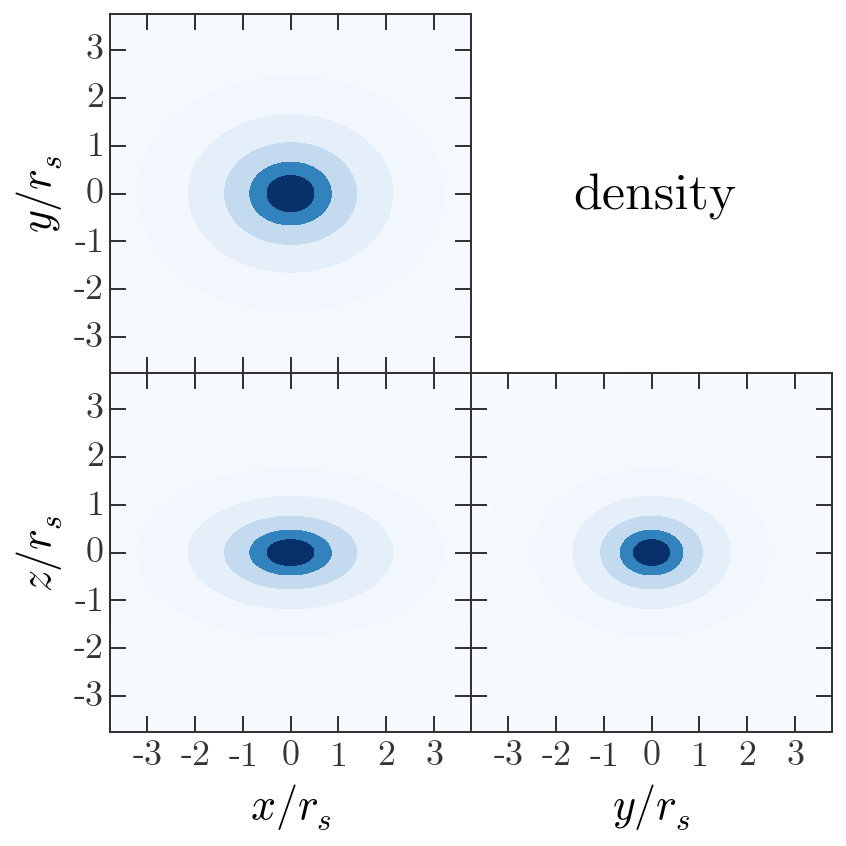

In [71]:
lim = 75
grid = np.linspace(-100,100,1000)
cmap = 'Blues'
vals = potential.density(np.array([[1.,0,0],[lim,0,0]]))

# levels = np.linspace(vals.min(), vals.max(), 16)
# levels = np.logspace(np.log10(vals.min()), np.log10(vals.max()), 16)
levels = np.logspace(4, 7., 8)

# ------------------------------------------------

fig,axes = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)
fig.set_facecolor('w')
fig = potential.plot_densty_contours(grid=(grid,grid,0), ax=axes[0,0], cmap=cmap, levels=levels, extend='both')
fig = potential.plot_densty_contours(grid=(grid,0,grid), ax=axes[1,0], cmap=cmap, levels=levels, extend='both')
fig = potential.plot_densty_contours(grid=(0,grid,grid), ax=axes[1,1], cmap=cmap, levels=levels, extend='both')

axes[0,0].set_xlim(-75,75)
axes[0,0].set_ylim(*axes[0,0].get_xlim())

axes[0,0].set_ylabel(r"$y/r_s$")
axes[1,0].set_xlabel(r"$x/r_s$")
axes[1,0].set_ylabel(r"$z/r_s$")
axes[1,1].set_xlabel(r"$y/r_s$")

# Hack to hide hole
axes[0,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,0].plot(0,0,marker='o',zorder=-1000,c='k')
axes[1,1].plot(0,0,marker='o',zorder=-1000,c='k')

tk = np.arange(-3,3+1,1)
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_ticks(tk * r_s)
    ax.yaxis.set_ticks(tk * r_s)
    
    ax.xaxis.set_ticklabels(["{0:d}".format(x) for x in tk])
    ax.yaxis.set_ticklabels(["{0:d}".format(x) for x in tk])

fig.text(0.77,0.75,"density", fontsize=26, ha="center")
    
fig.tight_layout()
fig.subplots_adjust(wspace=0., hspace=0.)
axes[0,1].set_visible(False)

fig.savefig(os.path.join(figure_path, "density-contours.pdf"))

In [8]:
maxx = 75.
grid1d = np.linspace(-maxx,maxx,128)
xx,yy,zz = np.meshgrid(grid1d,grid1d,grid1d)

In [9]:
xyz = np.vstack((xx.flat,yy.flat,zz.flat)).T
pot_val = np.abs(potential.value(xyz).reshape(xx.shape))

In [10]:
data = dict(potential=(pot_val, "kpc**2/Myr**2"))
bbox = np.array([[-maxx, maxx], [-maxx, maxx], [-maxx, maxx]])
ds = yt.load_uniform_grid(data, pot_val.shape, bbox=bbox, length_unit="kpc")

yt : [INFO     ] 2015-05-21 13:59:24,208 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-05-21 13:59:24,209 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2015-05-21 13:59:24,212 Parameters: domain_left_edge          = [-75. -75. -75.]
yt : [INFO     ] 2015-05-21 13:59:24,219 Parameters: domain_right_edge         = [ 75.  75.  75.]
yt : [INFO     ] 2015-05-21 13:59:24,220 Parameters: cosmological_simulation   = 0.0


In [15]:
# Choose a field
field = 'potential'

# Find the bounds in log space of for your field
dd = ds.all_data()
mi, ma = dd.quantities.extrema(field)

# Instantiate the ColorTransferfunction.
tf = yt.ColorTransferFunction((mi, ma))

# Set up the camera parameters: center, looking direction, width, resolution
c = (ds.domain_right_edge + ds.domain_left_edge)/2.0
W = (100.,'kpc') 
N = 512

for i,phi in enumerate(np.linspace(0,np.pi/2.,5)):
    cam_dir = np.array([75.*np.cos(phi), 0., 75*np.sin(phi)])

    # Create a camera object
    cam = ds.camera(c, cam_dir, W, N, tf, fields=[field], log_fields=[False], no_ghost=False)

    # tf.add_layers(5, mi=mi, ma=yt.YTQuantity(-0.15,mi.units), colormap='RdBu')
    tf.add_layers(10, mi=mi, ma=ma, colormap='RdBu')
    im = cam.snapshot()
    im.write_png('/Users/adrian/projects/morphology/plots/triaxial-NFW/{0:03d}.png'.format(i))
#     cam.show()

---